In [ ]:
#@title Load the imports

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

print("Ran the import statements.")

Ran the import statements.


In [ ]:
#@title Load and prepare dataset

train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")
print(train_df.shape, test_df.shape)
train_df.head(3)

(17000, 9) (3000, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66900.0
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80100.0
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85700.0


In [ ]:
# shuffle
train_df = train_df.reindex(np.random.permutation(train_df.index))

In [ ]:
# normalize train
train_mean = train_df.mean()
train_std = train_df.std()
train_df_norm = (train_df - train_mean) / train_std
train_df_norm.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.4,-1.4,-2.2,-1.2,-1.3,-1.2,-1.3,-1.8,-1.7
25%,-1.1,-0.8,-0.8,-0.5,-0.6,-0.6,-0.6,-0.7,-0.8
50%,0.5,-0.6,0.0,-0.2,-0.3,-0.2,-0.2,-0.2,-0.2
75%,0.8,1.0,0.7,0.2,0.3,0.3,0.3,0.5,0.5
max,2.6,3.0,1.9,16.2,14.0,29.8,14.5,5.8,2.5


In [ ]:
# normalize test
test_df_norm = (test_df - train_mean) / train_std

In [ ]:
# set target
threshold = 265_000

train_df_norm["median_house_value_is_high"] = (train_df.median_house_value > threshold).astype(float)
test_df_norm["median_house_value_is_high"] = (test_df.median_house_value > threshold).astype(float)

In [ ]:
#@title model
# set feats input to keras
inputs = {
    "median_income": tf.keras.Input(shape=(1,)),
    "total_rooms": tf.keras.Input(shape=(1,)),
}

In [32]:
def create_model(my_inputs, lr, METRICS):
    concatenated_input = tf.keras.layers.Concatenate()(my_inputs.values())
    dense = tf.keras.layers.Dense(units=1, activation=tf.sigmoid)
    dense_output = dense(concatenated_input)

    my_outputs = {
        "dense": dense_output
    }

    model = tf.keras.Model(inputs=my_inputs, outputs=my_outputs)

    model.compile(
        optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=lr),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=METRICS
    )

    return model

def train_model(model, dataset, epochs, label_name, batch_size=None, shuffle=True):
    features = {name:np.array(value) for name, value in dataset.items()}
    label = np.array(features.pop(label_name))
    history = model.fit(
        x=features, y=label,
        batch_size=batch_size,
        epochs=epochs,
        shuffle=shuffle
    )

    epochs = history.epoch

    hist = pd.DataFrame(history.history)

    return epochs, hist

def plot_curve(epochs, hist, list_of_metrics):

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:639: UserWarning: Input dict contained keys ['longitude', 'latitude', 'housing_median_age', 'total_bedrooms', 'population', 'households', 'median_house_value'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


170/170 [==============================] - 1s 2ms/step - loss: 0.9725 - accuracy: 0.2261 - precision: 0.1508 - recall: 0.4528 - auc: 0.2455
Epoch 2/20
170/170 [==============================] - 0s 2ms/step - loss: 0.8719 - accuracy: 0.2459 - precision: 0.1474 - recall: 0.4219 - auc: 0.2541
Epoch 3/20
170/170 [==============================] - 0s 2ms/step - loss: 0.7828 - accuracy: 0.2874 - precision: 0.1443 - recall: 0.3756 - auc: 0.2666
Epoch 4/20
170/170 [==============================] - 0s 2ms/step - loss: 0.7062 - accuracy: 0.3799 - precision: 0.1462 - recall: 0.3063 - auc: 0.2907
Epoch 5/20
170/170 [==============================] - 0s 2ms/step - loss: 0.6405 - accuracy: 0.5564 - precision: 0.1823 - recall: 0.2225 - auc: 0.3366
Epoch 6/20
170/170 [==============================] - 0s 2ms/step - loss: 0.5869 - accuracy: 0.6842 - precision: 0.2678 - recall: 0.1523 - auc: 0.4633
Epoch 7/20
170/170 [==============================] - 0s 2ms/step - loss: 0.5438 - accuracy: 0.7363 - pre

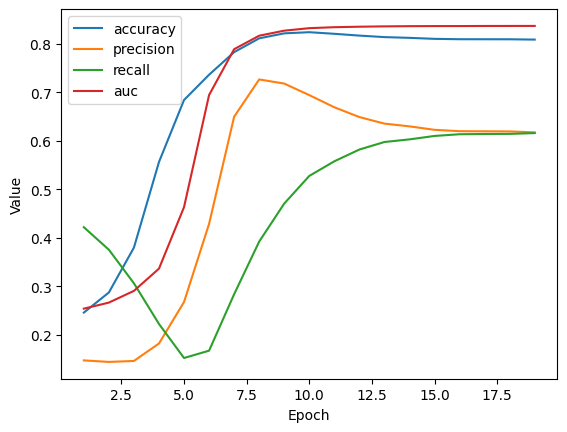

In [36]:
learning_rate = 0.001
epochs = 20
batch_size = 100
label_name = "median_house_value_is_high"
classification_threshold = 0.35

METRICS = [
    tf.keras.metrics.BinaryAccuracy(name="accuracy", threshold=classification_threshold),
    tf.keras.metrics.Precision(name="precision", thresholds=classification_threshold),
    tf.keras.metrics.Recall(name="recall", thresholds=classification_threshold),
    tf.keras.metrics.AUC(name="auc", num_thresholds=100)
]

my_model = create_model(inputs, learning_rate, METRICS)
epochs, hist = train_model(
    my_model, train_df_norm, epochs, label_name, batch_size
)

list_of_metrics_to_plot = ['accuracy', 'precision', 'recall', 'auc']
plot_curve(epochs, hist, list_of_metrics_to_plot)

In [30]:
features = {name:np.array(value) for name, value in test_df_norm.items()}
label = np.array(features.pop(label_name))
my_model.evaluate(x=features, y=label, batch_size=batch_size)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:639: UserWarning: Input dict contained keys ['longitude', 'latitude', 'housing_median_age', 'total_bedrooms', 'population', 'households', 'median_house_value'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


30/30 [==============================] - 1s 6ms/step - loss: 0.4070 - accuracy: 0.8047


[0.40696728229522705, 0.8046666383743286]